In [2]:
from pyspark.sql import SparkSession, functions as f, types as t, Column, DataFrame


spark = SparkSession.builder.getOrCreate()

dataset = spark.read.parquet('gs://open-targets-pre-data-releases/230123_literature/output/matches/')
dataset.show()
dataset.show(1, False, True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/01/30 15:24:00 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
23/01/30 15:24:00 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
23/01/30 15:24:01 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
23/01/30 15:24:01 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


+--------+----------+----------+----------+----+-----+---+--------------------+--------+--------------------+------------+-------------+------------------+------------------+----------+------------+---------------+----+----------+--------+
|    pmid|     pmcid|   pubDate|      date|year|month|day|           organisms| section|                text|trace_source|endInSentence|             label|            labelN|sectionEnd|sectionStart|startInSentence|type| keywordId|isMapped|
+--------+----------+----------+----------+----+-----+---+--------------------+--------+--------------------+------------+-------------+------------------+------------------+----------+------------+---------------+----+----------+--------+
| 1600261|      null|1992-02-01|1992-02-01|1992|    2|  1|                  []|abstract|Enalapril and tri...|            |           32|trichlormethiazide| trichlormethiazid|       314|         166|             14|  CD|CHEMBL1054|    true|
| 7703975|      null|1994-11-01|1994-11-

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------------------------
 pmid            | 1600261                                                                                                                                              
 pmcid           | null                                                                                                                                                 
 pubDate         | 1992-02-01                                                                                                                                           
 date            | 1992-02-01                                                                                                                                           
 year            | 1992                                                                                                                                    

In [3]:
dataset.printSchema()

root
 |-- pmid: string (nullable = true)
 |-- pmcid: string (nullable = true)
 |-- pubDate: string (nullable = true)
 |-- date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- organisms: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- section: string (nullable = true)
 |-- text: string (nullable = true)
 |-- trace_source: string (nullable = true)
 |-- endInSentence: long (nullable = true)
 |-- label: string (nullable = true)
 |-- labelN: string (nullable = true)
 |-- sectionEnd: long (nullable = true)
 |-- sectionStart: long (nullable = true)
 |-- startInSentence: long (nullable = true)
 |-- type: string (nullable = true)
 |-- keywordId: string (nullable = true)
 |-- isMapped: boolean (nullable = true)



In [16]:
(
    dataset
    .filter(
        # Filter for available pmid:
        f.col('pmid').isNotNull() &
        # Filter for mapped entity:
        f.col('isMapped') & 
        # Filter for date:
        (f.col('year') == 2022)
    )
    .count()
    
    # Filter for date:
    
    # Select relevant fields: pmid, date 
)

46782188

In [17]:
(
    dataset
    .filter(
        # Filter for available pmid:
        f.col('pmid').isNotNull() &
        # Filter for mapped entity:
        f.col('isMapped')
        & f.col('year').isNotNull()
     )
    .count()
)

386572745

In [10]:
# EGFR:
target_id = 'ENSG00000146648'

# Let's see how many publications do we found:
(
    dataset
    .filter(
        # Filter for available pmid:
        f.col('pmid').isNotNull() &
        # Filter for mapped entity:
        f.col('isMapped') & 
        # Filter for date:
        # (f.col('year') == 2022) & 
        # Filter for targetid:
        (f.col('keywordId') == target_id)
    )
    .select('pmid')
    .distinct()
    .count()
    
    # Filter for date:
    
    # Select relevant fields: pmid, date 
)

129281

In [18]:
pmid = '36335869'

(
    dataset
    .filter(
        # Filter for available pmid:
        f.col('pmid') == pmid
    )
    .count()
)

0

In [14]:
(
    dataset
    .filter(
        # Filter for available pmid:
        # f.col('pmid').isNotNull() &
        # Filter for mapped entity:
        f.col('isMapped') & 
        # Filter for date:
        (f.col('year') == 2022)
    )
    .select('pmid', 'pmcid')
    .distinct()
    .count()
    # Filter for date:
    
    # Select relevant fields: pmid, date 
)

496

In [20]:
(
    dataset
    .filter(
        # Filter for available pmid:
        # f.col('pmid').isNotNull() &
        # Filter for mapped entity:
        f.col('isMapped') & 
        # Filter for date:
        (f.col('year') == 2022) & 
        # Filter for targetid:
        (f.col('keywordId') == target_id)
    )
    .select('pmid')
    .distinct()
    .count()
    
    # Filter for date:
    
    # Select relevant fields: pmid, date 
)

9022

In [6]:
(
    dataset
    .filter(f.col('pmid').isNotNull())
    .select('pmid', 'date')
    .distinct()
    .show()
)

+----------+----------+
|      pmid|      date|
+----------+----------+
|  24699514|2014-01-01|
|  35861926|2022-07-01|
|  24164459|2013-11-14|
|  29357776|2018-01-22|
|  25407270|2015-02-01|
|  10977938|2000-05-01|
|  33311577|2021-05-01|
|PMC9312925|2022-07-01|
|  25130857|2014-08-14|
|  29623594|2018-06-01|
|  30095664|2018-08-01|
|  24849690|2014-01-01|
|  35334035|2022-06-01|
|  28846182|2017-09-27|
|  29052570|2017-10-01|
|  35453626|2022-04-01|
|  35503137|2022-05-01|
|  33962654|2021-05-01|
|    984479|1976-12-01|
|   7234213|1981-01-01|
+----------+----------+
only showing top 20 rows



In [28]:
dates = ("2019-01-01",  "2022-12-31")
date_from, date_to = [f.to_date(f.lit(s)).cast(t.TimestampType()) for s in dates]

aggregated = (
    dataset
    .filter(
        f.col('pmid').isNotNull() &
        (f.col("date") > date_from) & 
        (f.col('date') < date_to)
    )
    .select(
        'pmid',
        f.month(f.col('date')).alias("month"),
        f.year(f.col('date')).alias('year')
    )
    .distinct()
    .groupBy('month', 'year')
    .count()
    .toPandas()
)

aggregated.head()

,month,year,count
0,11,2021,48985
1,5,2022,70024
2,12,2020,52767
3,6,2019,33219
4,9,2019,32320


<AxesSubplot:title={'center':'publication count per month'}, xlabel='month'>

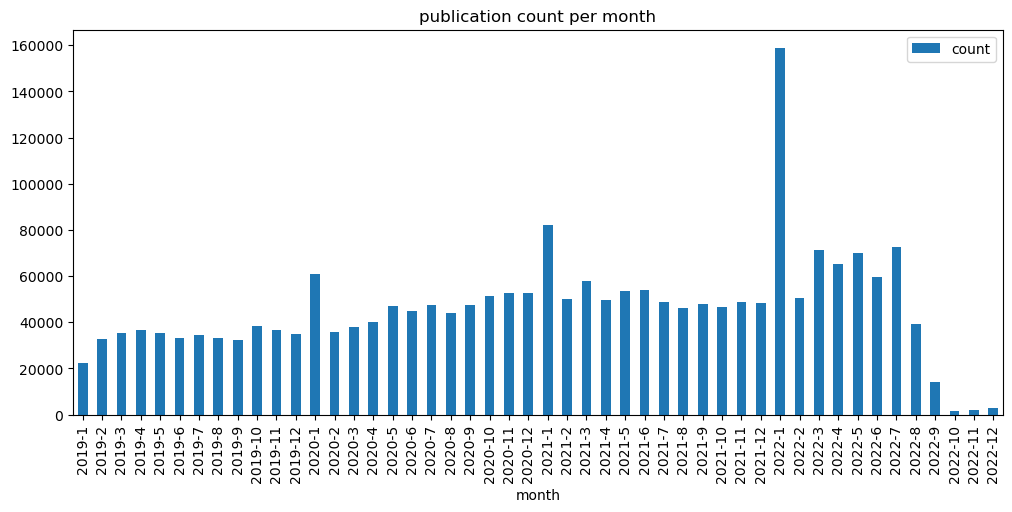

In [29]:
(
    aggregated
    .assign(ylab=lambda df: df.apply(lambda row: f'{row["year"]}-{row["month"]}', axis=1))
    .sort_values(['year', 'month'], axis=0)
    .plot(y='count', x='ylab', kind='bar', title='publication count per month', xlabel='month', figsize=(12,5))
)

In [35]:
(
    dataset
    .filter(
        f.col('date') >= f.to_date(f.lit('2022-10-01')).cast(t.TimestampType())
    )
    .select(
        'pmid', 'date', 'pmcid', 'year', 'month','day', 'pubDate'
    )
    .distinct()
    .show()
)

+--------+----------+----------+----+-----+---+----------+
|    pmid|      date|     pmcid|year|month|day|   pubDate|
+--------+----------+----------+----+-----+---+----------+
|36451432|2022-11-01|PMC9704884|2022|   11|  1|2022-11-01|
|35450515|2022-12-01|PMC9132467|2022|   12|  1|2022-12-01|
|35574052|2023-01-01|PMC9058963|2023|    1|  1|2023-01-01|
|36430838|2022-11-01|PMC9695686|2022|   11|  1|2022-11-01|
|35688487|2022-10-01|PMC9187872|2022|   10|  1|2022-10-01|
|35881053|2022-12-01|PMC9336502|2022|   12|  1|2022-12-01|
|36090957|2022-12-01|PMC9448632|2022|   12|  1|2022-12-01|
|35259853|2022-10-01|PMC9083175|2022|   10|  1|2022-10-01|
|35821796|2022-10-01|PMC9272497|2022|   10|  1|2022-10-01|
|35686572|2022-12-01|PMC9347473|2022|   12|  1|2022-12-01|
|36434541|2022-11-01|PMC9701023|2022|   11|  1|2022-11-01|
|35363108|2022-12-01|PMC9004519|2022|   12|  1|2022-12-01|
|35678258|2022-12-01|PMC9196826|2022|   12|  1|2022-12-01|
|36430826|2022-11-01|PMC9697549|2022|   11|  1|2022-11-0

In [36]:
dates = ("2019-01-01",  "2022-12-31")
date_from, date_to = [f.to_date(f.lit(s)).cast(t.TimestampType()) for s in dates]

aggregated = (
    dataset
    .filter(
        f.col('pmid').isNotNull() &
        (f.col("date") > date_from) & 
        (f.col('date') < date_to)
    )
    .select(
        'pmid', 'type',
        f.month(f.col('date')).alias("month"),
        f.year(f.col('date')).alias('year')
    )
    .distinct()
    .groupBy('month', 'year', 'type')
    .count()
    .toPandas()
)

aggregated.head()

,month,year,type,count
0,6,2022,GP,30547
1,1,2021,CD,35371
2,6,2022,CD,34243
3,8,2022,CD,18299
4,11,2022,CD,1194


In [37]:
aggregated.pivot(index=['year', 'month'], columns='type', values='count').head()

type           CD     DS     GP
year month                     
2019 1       8585  15951   8769
     2      13681  23706  13221
     3      14576  26241  14083
     4      15537  27687  15492
     5      14558  26095  14170

In [38]:
(
    dataset
    .filter(
        f.col('pmid').isNotNull() &
        (f.col("date") > date_from) & 
        (f.col('date') < date_to)
    )
    .select(
        'pmid', 'type',
        f.month(f.col('date')).alias("month"),
        f.year(f.col('date')).alias('year')
    )
    .distinct()
    .groupBy('month', 'year', 'type')
    .count()
    .show()
)

+-----+----+----+-----+
|month|year|type|count|
+-----+----+----+-----+
|    6|2022|  GP|30547|
|    6|2022|  CD|34243|
|    1|2021|  CD|35371|
|    8|2022|  CD|18299|
|   11|2022|  CD| 1194|
|    1|2022|  CD|84623|
|    5|2019|  CD|14558|
|    7|2020|  GP|18811|
|    4|2019|  GP|15492|
|    1|2020|  DS|47627|
|    9|2020|  DS|37198|
|   11|2021|  GP|19643|
|    9|2020|  GP|19039|
|    7|2022|  DS|58240|
|    4|2022|  GP|31522|
|   11|2022|  DS| 1567|
|    9|2019|  DS|23924|
|    2|2020|  DS|26532|
|    3|2020|  CD|15069|
|    8|2021|  CD|19888|
+-----+----+----+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.window import Window